# "Titanic: Machine Learning from Disaster" Kaggle Competition

https://www.kaggle.com/c/titanic/overview

Submission Notebook by Richard Kaldenhoven


## 1. Problem Definition

The objective of this notebook is to develop a machine learning model that can predict whether or not a passenger survived the disaster aboard the Titanic. Information about the passengers is provided in a dataset with the following columns:

| Column   | Definition                                                           |
|----------|----------------------------------------------------------------------|
| survival | Survival (0 for No, 1 for Yes)                                       |
| pclass   | Ticket Class (1, 2, or 3)                                            |
| sex      | Gender                                                               |
| Age      | Age of passenger                                                     |
| sibsp    | Number of siblings or spouses with the passenger                     |
| parch    | Number of parents or children with the passenger                     |
| ticket   | Ticket number                                                        |
| fare     | Passenger fare                                                       |
| cabin    | Cabin number                                                         |
| embarked | Port of Embarkation (C - Cherbourg, Q - Queenstown, S - Southampton) |

The machine learning model that is developed will learn from the information in the columns (features) of the data in order to predict the survival (target). Two sets of data are provided: a training set, and a test set. The test set does not contain the survival column, as that is the target to be predicted. Predictions on the test set made by the machine learning model are submitted to Kaggle for scoring, using the accuracy performance metric.

## 2. Load Data 

The code below loads the training and test datasets, previews the data, and identifies any columns with missing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The `Age` and `Cabin` features are missing values in both the training and test sets. The training set is also missing 2 `Embarked` values, and the test set is missing only 1 `Fare` value.

## 3. Exploratory Data Analysis

In this section, the training dataset is explored in order to determine what factors influence a passengers survival.

It is important to note that only the training set is analyzed, so any numbers calculated are not representative of the total number of passengers (for example, the number of passengers survived is based on only the number of survived in the training set).

In [9]:
num_survived = len(df_train[df_train['Survived'] == 1])
print(f'Number survived: ', num_survived)
print(f'% survived: ', (num_survived / len(df_train) * 100))

Number survived:  342
% survived:  38.38383838383838


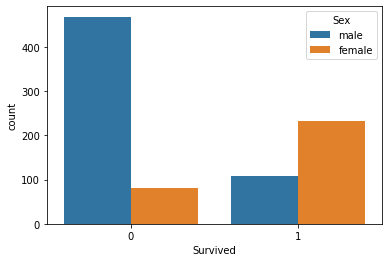

In [10]:
sns.countplot(x='Survived',data=df_train,hue='Sex')

In [11]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Most of the passengers who survived were female. The passengers who did not survive were largely male.

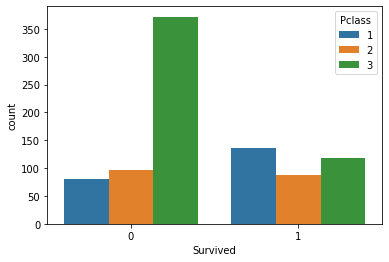

In [12]:
sns.countplot(x='Survived',data=df_train,hue='Pclass')

In [13]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most of the passengers who did not survive belonged to the 3rd class, however most of the passengers belonged to the 3rd class anyway (the 3rd class had more passengers than 1st and 2nd combined). For the passengers who did survive, the class feature alone was less of an indication of survival.

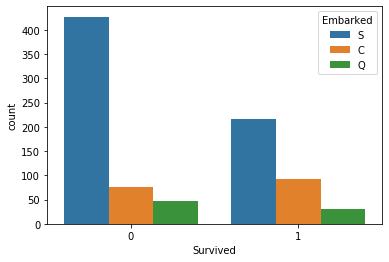

In [14]:
sns.countplot(x='Survived',data=df_train,hue='Embarked')

In [15]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

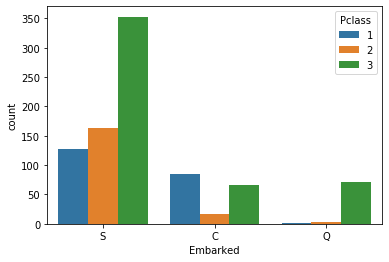

In [16]:
sns.countplot(x='Embarked',data=df_train,hue='Pclass')

Most of the passengers who did not survive boarded the Titanic at Southampton, however most of the passengers boarded at that location as well, making the fact that more passengers who survived came from Southampton less relevant.

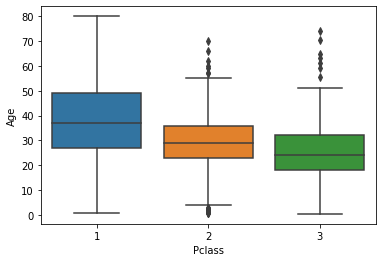

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

When it comes to class, there is a slight upward trend in age, with 1st class passengers being slightly older than those in 2nd and 3rd. There are many outliers for 2nd and 3rd class. 

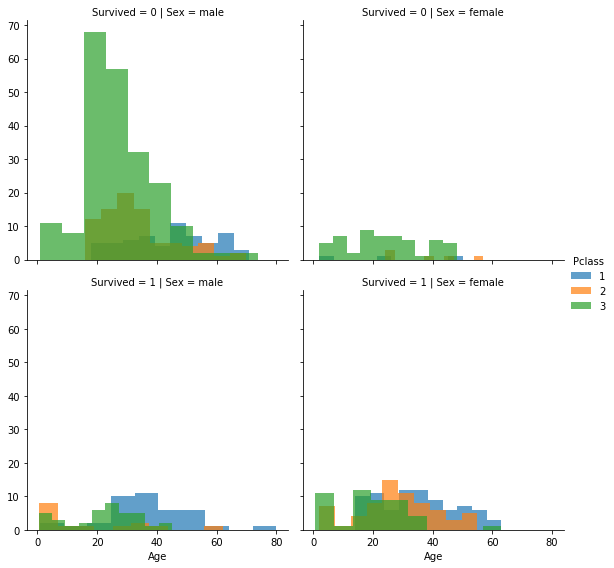

In [18]:
g = sns.FacetGrid(df_train,col='Sex',row='Survived',hue='Pclass',height=4,aspect=1)
g = g.map(plt.hist,'Age',alpha=0.7).add_legend()

The plot above shows the number of passengers that survived or did not survive, based on their age, sex, and class.

Considering male passengers:

* The passengers who did not survive were mostly males aged 20-30 in 3rd class. Many males of the same age from 2nd class also did not survive. 
* Males who did survive were middle aged and came from 2nd class.

Considering female passengers:

* Survivors came from all classes, where the age increases with class (1st class older than 2nd, etc.)
* Passengers who did not survive were from 3rd class, although as observed previously most passengers were in 3rd class



To gain a better understanding of how class, sex, and ports of embarkation influence survival, tables are generated that show the percentage survival based on these features. Expressing survival as a percentage removes the impact imbalances between the number of passengers from differing ports of embarkation and classes.

In [19]:
round(df_train[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean()*100,1)

Survived
Pclass Sex             
1      female      96.8
       male        36.9
2      female      92.1
       male        15.7
3      female      50.0
       male        13.5

In [20]:
round(df_train[['Pclass','Sex','Embarked','Survived']].groupby(['Pclass','Sex','Embarked']).mean()*100,1)

Survived
Pclass Sex    Embarked          
1      female C             97.7
              Q            100.0
              S             95.8
       male   C             40.5
              Q              0.0
              S             35.4
2      female C            100.0
              Q            100.0
              S             91.0
       male   C             20.0
              Q              0.0
              S             15.5
3      female C             65.2
              Q             72.7
              S             37.5
       male   C             23.3
              Q              7.7
              S             12.8

Most female passengers in 1st and 2nd class survived, but only 50% survived in 3rd class. There were similar rates of survival for males in 2nd and 3rd class (around 13-16%), but in 1st class there was almost twice as many survivors (37%).

The trend of increased female survival continues, however it is unclear from the data if the port of embarkation influences survival. The passenger class and sex appear to be stronger indicators of survival.

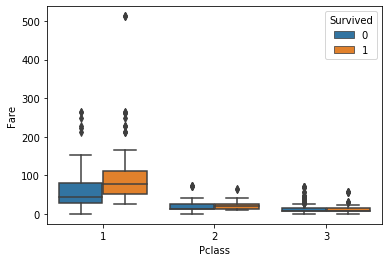

In [21]:
sns.boxplot(x='Pclass',y='Fare',data=df_train,hue='Survived')

The passenger fare and class do not impact survival for any of the classes. Although there is a slight increase in survival for those who paid a higher fare there is still overlap with the fare prices for those who did not survive. It is possible that higher fares were for cabins located in a more favorable location for escape from the boat, however with so much cabin information missing it is likely not possible to investigate further.

## 4. Data Cleaning

In order to proceed with further data analysis and eventual model development, the data must be cleaned. The following steps will be taken, with the code below:

1. Age may be an important feature to predict survival, unfortunately there are many missing observations in the train and test sets. These will be filled in using a lookup table based on the average age of passengers, grouped by Title, Pclass, and Sex. Title is a new feature that will need to be extracted from the passenger Name.

2. It is assumed that the large number of missing Cabin data was never recorded, and since there are so many missing the feature will be dropped.

3. The missing Embarked data will be filled in with the most common value 'S'

4. The missing Fare value will be filled in with the mean of the appropriate Pclass

5. There is only 1 'Ms' in Pclass 3, and she has no age, so the age will be filled in with the average age for her Pclass. (Note the missing value in lookup table)

6. The  `Name` and `Ticket` features are removed, and the `PassengerId` feature is stored for later use when generating a submission file

**Step 1.** Filling in missing age values

In [22]:
df_list = [df_train,df_test]

In [23]:
for df in df_list:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [24]:
# create new df which is test appended to train
# used for creating title lookup table to create title column for each df
df_full = df_train.append(df_test)

In [25]:
df_full['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Capt          1
Jonkheer      1
Lady          1
Countess      1
Dona          1
Mme           1
Sir           1
Don           1
Name: Title, dtype: int64

In [26]:
rare_titles = ['Dr','Rev','Col','Ms','Mlle','Major','Countess','Jonkheer','Capt','Lady','Mme','Dona','Sir','Don']

df_full['Title'].replace(rare_titles,'Rare',inplace=True)
df_full['Title'].replace('Mme','Mrs',inplace=True)
df_full['Title'].replace('Mlle','Miss',inplace=True)
df_full['Title'].replace('Ms','Miss',inplace=True)

In [27]:
look = df_full.groupby(['Title','Pclass','Sex']).mean()['Age'].reset_index()
look

,Title,Pclass,Sex,Age
0,Master,1,male,6.984000
1,Master,2,male,2.757273
2,Master,3,male,6.090000
3,Miss,1,female,30.338983
4,Miss,2,female,20.717083
5,Miss,3,female,17.360874
6,Mr,1,male,41.450758
7,Mr,2,male,32.346715
8,Mr,3,male,28.318910
9,Mrs,1,female,43.208955


In [28]:
# test lookup
look[(look['Title'] == 'Master') & (look['Pclass'] == 2)]['Age'].values[0]

2.7572727272727273

In [29]:
for df in df_list:
    df['Title'].replace(rare_titles,'Rare',inplace=True)
    df['Title'].replace('Mme','Mrs',inplace=True)
    df['Title'].replace('Mlle','Miss',inplace=True)
    df['Title'].replace('Ms','Miss',inplace=True)

In [30]:
def impute_age(columns):
    
    Title = columns[0]
    Pclass = columns[1]
    Sex = columns[2]
    Age = columns[3]
    
    if pd.isnull(Age):
        return look[(look['Title'] == Title) & (look['Pclass'] == Pclass) & (look['Sex'] == Sex)]['Age'].values[0]
    else:
        return Age
    

In [31]:
for df in df_list:
    df['Age'] = df[['Title','Pclass','Sex','Age']].apply(impute_age,axis=1)

**Step 2.** Removing the `Cabin` feature

In [32]:
df_train.drop('Cabin',axis=1,inplace=True)

In [33]:
df_test.drop('Cabin',axis=1,inplace=True)

**Step 3.** Filling in missing `Embarked` data

In [34]:
df_train.fillna('S',axis=0,inplace=True)

**Step 4.** Filling in missing `Fare` value

In [35]:
df_test[df_test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [36]:
df_test.at[152,'Fare'] = df_test.groupby('Pclass').mean()['Fare'][3]

**Step 5.** Filling in last `Age` value

In [37]:
# There is only 1 'Ms' in Pclass 3, and she has no age
df_test[df_test['Age'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,Q,Rare


In [38]:
df_test.at[88,'Age'] = df_test.groupby('Pclass').mean()['Age'][3]

**Step 6.** Removing `Name` and `Ticket`, storing `PassengerId`

In [39]:
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [40]:
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [41]:
df_train_PassengerId = df_train['PassengerId']
df_train.drop('PassengerId',axis=1,inplace=True)

In [42]:
df_test_PassengerId = df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

In [43]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [44]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## 5. Feature Engineering

The `SibSp` and `Parch` features are more useful if reworked into `FamilySize` and `IsAlone` features.

In [45]:
for df in df_list:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # FamilySize = 1 means is an individual, so SibSp = 0 and Parch = 0

In [46]:
def is_alone(column):
    FamilySize = column
    
    if FamilySize == 1:
        return 1
    else:
        return 0
    
    # return 1 for Yes (alone), 0 for No (has family)

In [47]:
for df in df_list:
    df['IsAlone'] = df['FamilySize'].apply(is_alone)

In [48]:
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)

In [49]:
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [50]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [51]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,male,34.5,7.8292,Q,Mr,1,1
1,3,female,47.0,7.0000,S,Mrs,2,0
2,2,male,62.0,9.6875,Q,Mr,1,1
3,3,male,27.0,8.6625,S,Mr,1,1
4,3,female,22.0,12.2875,S,Mrs,3,0


## 6. More Exploratory Data Analysis

With the data cleaned and the `SibSp` and `Parch` features converted to `FamilySize` and `IsAlone` features, more data analysis can be done to find more factors for survival.

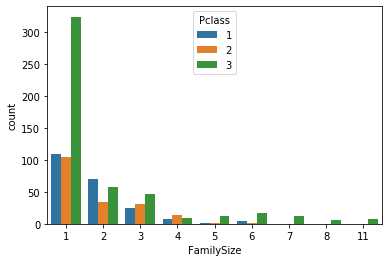

In [52]:
sns.countplot(x='FamilySize',data=df_train,hue='Pclass')

There were some larger families, and also many individual solo travelers in 3rd class.

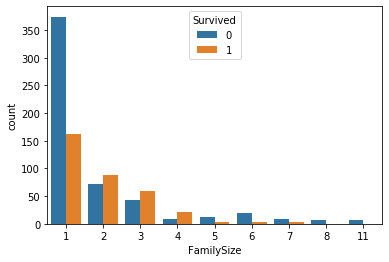

In [53]:
sns.countplot(x='FamilySize',data=df_train,hue='Survived')

Many individual passengers did not survive. There is almost an equal proportion of those who survived and did not survive for family sizes of 2 and 3. Passengers belonging to a family size of 5 or larger likely did not survive, although there is not much data.

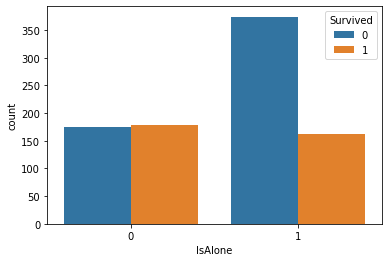

In [54]:
sns.countplot(x='IsAlone',data=df_train,hue='Survived')

In terms of proportion, solo passengers were more likely to not survive, while those travelling as part of a family had equal chances of surviving or not surviving.

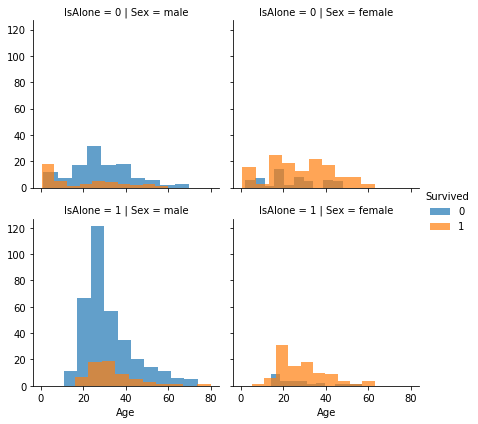

In [55]:
g = sns.FacetGrid(df_train,col='Sex',row='IsAlone',hue='Survived')
g = g.map(plt.hist,'Age',alpha=0.7).add_legend()

The above plot shows how solo male travelers in the age range of approximately 20-30 did not survive. Males in that age range who were part of a family were also more likely to survive, where surviving males were children. Solo female travelers were more commonly younger than those travelling with families, but females of all ages and family sizes appear more likely to survive than males.

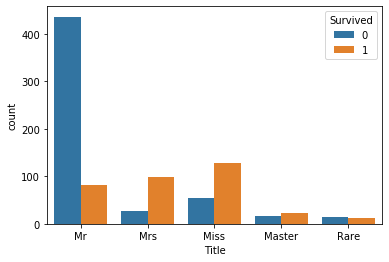

In [56]:
sns.countplot(x='Title',data=df_train,hue='Survived')

When the passenger titles are considered, it is shown again that adult males ('Mr') are the ones who were most likely to not survive.

In order to check for correlation between the features and the target, one-hot encoded dummy variables are created for the categorical variables `Sex`, `Embarked` and `Title`.

In [57]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embarked = pd.get_dummies(df_train['Embarked'],drop_first=True)
title = pd.get_dummies(df_train['Title'],drop_first=True)

In [58]:
df_train.drop(['Sex','Embarked','Title'],axis=1,inplace=True)

In [59]:
df_train = pd.concat([df_train,sex,embarked,title],axis=1)
df_train.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,male,Q,S,Miss,Mr,Mrs,Rare
0,0,3,22.0,7.2500,2,0,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,2,0,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,1,1,0,0,1,1,0,0,0
3,1,1,35.0,53.1000,2,0,0,0,1,0,0,1,0
4,0,3,35.0,8.0500,1,1,1,0,1,0,1,0,0


In [60]:
# Repeat for test set

sex_test = pd.get_dummies(df_test['Sex'],drop_first=True)
embarked_test = pd.get_dummies(df_test['Embarked'],drop_first=True)
title_test = pd.get_dummies(df_test['Title'],drop_first=True)

df_test.drop(['Sex','Embarked','Title'],axis=1,inplace=True)

df_test = pd.concat([df_test,sex_test,embarked_test,title_test],axis=1)
df_test.head()

,Pclass,Age,Fare,FamilySize,IsAlone,male,Q,S,Miss,Mr,Mrs,Rare
0,3,34.5,7.8292,1,1,1,1,0,0,1,0,0
1,3,47.0,7.0000,2,0,0,0,1,0,0,1,0
2,2,62.0,9.6875,1,1,1,1,0,0,1,0,0
3,3,27.0,8.6625,1,1,1,0,1,0,1,0,0
4,3,22.0,12.2875,3,0,0,0,1,0,0,1,0


In [61]:
df_train.corr()['Survived'].sort_values(ascending=False)

Survived      1.000000
Mrs           0.339040
Miss          0.327093
Fare          0.257307
Rare          0.022030
FamilySize    0.016639
Q             0.003650
Age          -0.072471
S            -0.149683
IsAlone      -0.203367
Pclass       -0.338481
male         -0.543351
Mr           -0.549199
Name: Survived, dtype: float64

From the above corellation coefficients it is observed that none of the features have very high values. Surprisingly, `Age` does not have a high value. Instead, the `male` feature along with the `Mr` title have relatively high negative values indicating they are features that do not correlate with survival, which is consistent with what is observed in the previous data analysis. Conversely, female features have relatively high values, but not as high as male features. The `Fare` feature did not appear to predict survival in the data analysis, but in relation to the other corellation coefficients has a significant value.

The corellation coefficients are visualized in the heatmap below.

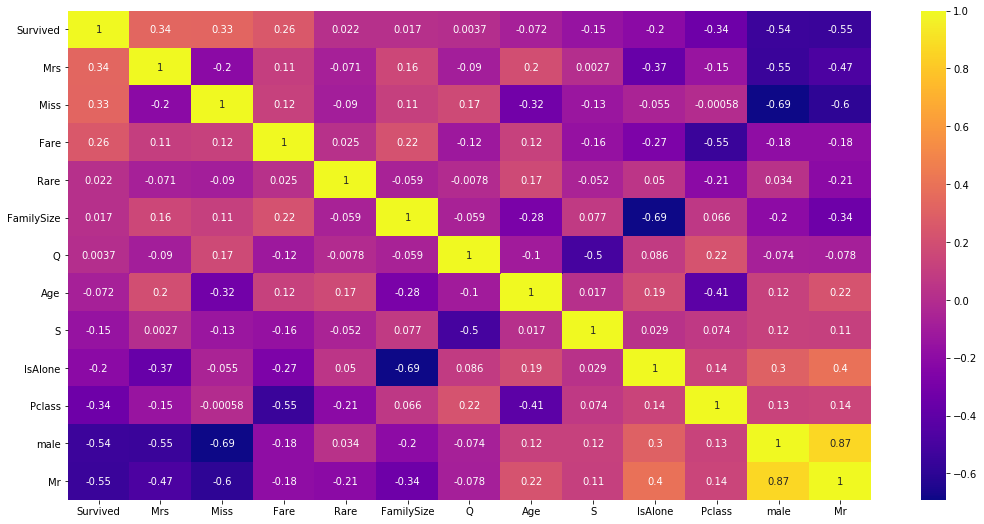

In [62]:
corr_list = df_train.corr()['Survived'].sort_values(ascending=False).index.to_list()

plt.figure(figsize=(18,9))
sns.heatmap(df_train[corr_list].corr(),cmap='plasma',annot=True)


## 7. Building a Machine Learning Model

In this section, several machine learning models will be built and then submitted for scoring on the Kaggle competition website. The Kaggle score is the accuracy of the model on predicting survival on the test set (number of correct predictions/number of passengers in test set).

Prior to using in a machine learning model, the training data is separated into `X_test`, containing the features, and `y_train` which contains the targets.

In [63]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']

### 7.1 Logistic Regression

A simple logistic regression model is first developed to set a baseline.

In [64]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
logpred = logmodel.predict(df_test)

In [66]:
index = df_test_PassengerId
submission_df = {'PassengerId': index,
                 'Survived': logpred}
submission = pd.DataFrame(submission_df)

In [67]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
submission.to_csv("submission v5.csv",index=False)

# the Kaggle Score of this submission is 0.77990

After submitting predictions to Kaggle, the accuracy score for the Logistic Regression model is 0.77990, or 77.99%.

### 7.2 Random Forest

Next, a Random Forest model is built using a grid search with cross validation to find the best parameters.

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=101)
param_grid = {'n_estimators':[50, 100, 150],
              'max_features':[2, 3, 4],
              'max_depth':[20],
              'min_samples_leaf':[2, 4, 6],
              'min_samples_split':[2, 4, 6],
              'bootstrap':[False]
             }

clf_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [146]:
clf_cv.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [147]:
clfpred = clf_cv.predict(df_test)

In [148]:
index = df_test_PassengerId
submission_df = {'PassengerId': index,
                 'Survived': clfpred}
submission = pd.DataFrame(submission_df)

In [150]:
submission.to_csv("submission v5 rfc.csv",index=False)

# the Kaggle Score of this submission is 0.75837

After submitting predictions to Kaggle the accuracy score for the Random Forest model is 0.75837, or 75.83%, which is lower than the Logistic Regression baseline.

## 8. Conclusion

Logistic Regression and Random Forest models have been developed to predict whether a passenger aboard the Titanic will survive. The Logistic Regression model has the highest accuracy score, at 77.99%.

Data analysis showed that male passengers in the approximate age range of 20-30 years old travelling in 3rd class were most likely to not survive the disaster. Female passengers of all ages had a better chance of surviving than males.